# Logistic Regression - Data Science Training

### What Is Classification?
Classification is an area of supervised machine learning that tries to predict which class or category some entity belongs to, based on its features.
The features or variables can take one of two forms:

* **Independent variables**, also called inputs or predictors, don’t depend on other features of interest (or at least you assume so for the purpose of the analysis).
* **Dependent variables**, also called outputs or responses, depend on the independent variables.

#### There are two main types of classification problems:

* Binary or binomial classification: exactly two classes to choose between (usually 0 and 1, true and false, or positive and negative)
* Multiclass or multinomial classification: three or more classes of the outputs to choose from

### Why can't we use Linear regression for Classification?
* A linear model does not output probabilities, but it treats the classes as numbers (0 and 1) and fits the best hyperplane (for a single feature, it is a line) that minimizes the distances between the points and the hyperplane. So it simply interpolates between the points, and you cannot interpret it as probabilities.

* A linear model also extrapolates and gives you values **below zero and above one**. This is a good sign that there might be a smarter approach to classification.

* Since the predicted outcome is not a probability, but a linear interpolation between points, there is no meaningful threshold at which you can distinguish one class from the other.

## What is Logistic Regression?
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

### Types of Questions Binary Logistic Regression Can Answer
Q. How does the probability of getting lung cancer (yes vs. no) change for every additional pound a person is overweight and for every pack of cigarettes smoked per day?

Q. Do body weight, calorie intake, fat intake, and age have an influence on the probability of having a heart attack (yes vs. no)?

<img src='logistic_formula.png'>

### Difference between Linear Regression and Logistic Regression
<img src='linear_vs_logistic_regression.jpg'  style='width:700px;height:300px'/>

## Logistic Regression Assumptions
* Binary logistic regression requires the dependent variable to be binary.
* For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* The independent variables are linearly related to the log odds.

In [1]:
#reading the data
import pandas as pd
data=pd.read_csv('data_titanic.csv').set_index('PassengerId')
print(data.shape)
data.head()

(891, 11)


,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,,,
1,0,22.0,7.2500,0,0,0,1,0,0,1,1
2,1,38.0,71.2833,0,1,0,0,1,0,0,0
3,1,26.0,7.9250,1,0,0,1,0,0,1,0
4,1,35.0,53.1000,0,1,0,0,0,0,1,0
5,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), data['Survived'], test_size=0.2)#, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 10) (179, 10) (712,) (179,)


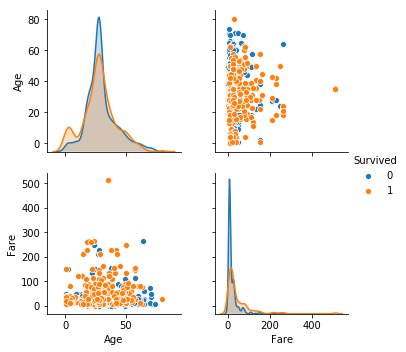

In [22]:
import seaborn as sns
sns.pairplot(data,vars=['Age','Fare'],hue='Survived')

EDA on Important Variables
Event Rate by : TravelAlone

 			Event Rate by  TravelAlone
   TravelAlone  Event  Total  Perc_Members  Perc_Event  Event_Rate
0            0    133    272      0.382022    0.501887    0.488971
1            1    132    440      0.617978    0.498113    0.300000


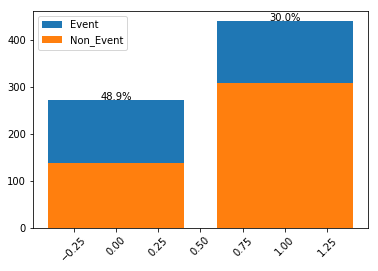

Event Rate by : Pclass_1

 			Event Rate by  Pclass_1
   Pclass_1  Event  Total  Perc_Members  Perc_Event  Event_Rate
0         0    166    543       0.76264    0.626415    0.305709
1         1     99    169       0.23736    0.373585    0.585799


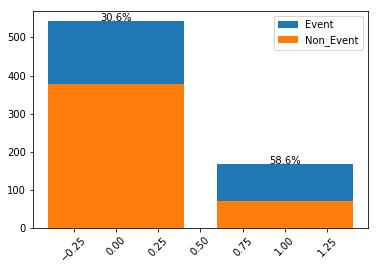

Event Rate by : Pclass_2

 			Event Rate by  Pclass_2
   Pclass_2  Event  Total  Perc_Members  Perc_Event  Event_Rate
0         0    198    561      0.787921     0.74717    0.352941
1         1     67    151      0.212079     0.25283    0.443709


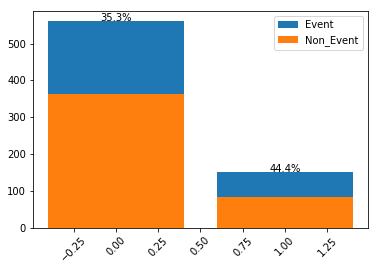

Event Rate by : Pclass_3

 			Event Rate by  Pclass_3
   Pclass_3  Event  Total  Perc_Members  Perc_Event  Event_Rate
0         0    166    320      0.449438    0.626415    0.518750
1         1     99    392      0.550562    0.373585    0.252551


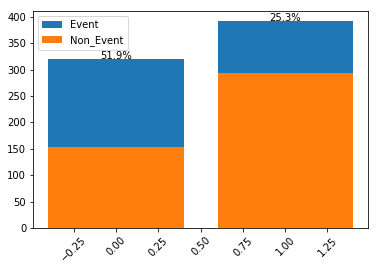

Event Rate by : Embarked_C

 			Event Rate by  Embarked_C
   Embarked_C  Event  Total  Perc_Members  Perc_Event  Event_Rate
0           0    190    577      0.810393    0.716981    0.329289
1           1     75    135      0.189607    0.283019    0.555556


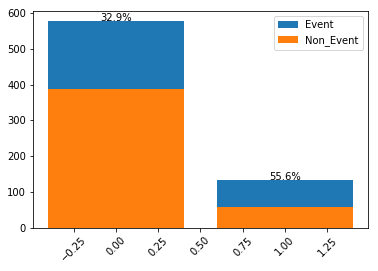

Event Rate by : Embarked_Q

 			Event Rate by  Embarked_Q
   Embarked_Q  Event  Total  Perc_Members  Perc_Event  Event_Rate
0           0    241    653      0.917135    0.909434    0.369066
1           1     24     59      0.082865    0.090566    0.406780


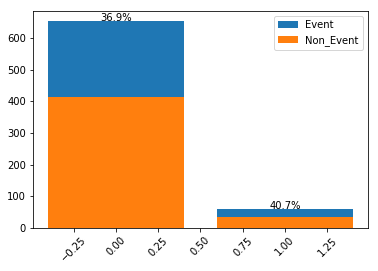

Event Rate by : Embarked_S

 			Event Rate by  Embarked_S
   Embarked_S  Event  Total  Perc_Members  Perc_Event  Event_Rate
0           0     99    194      0.272472    0.373585    0.510309
1           1    166    518      0.727528    0.626415    0.320463


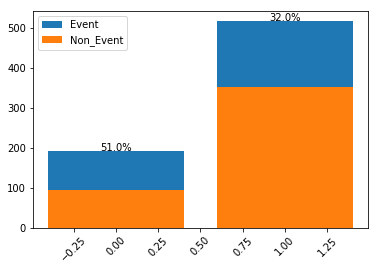

Event Rate by : Sex_male

 			Event Rate by  Sex_male
   Sex_male  Event  Total  Perc_Members  Perc_Event  Event_Rate
0         0    182    245      0.344101    0.686792    0.742857
1         1     83    467      0.655899    0.313208    0.177730


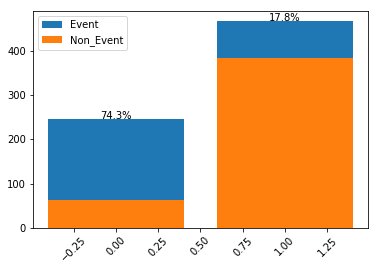

In [5]:
EDA_Imp(X_train,y_train,X_train.columns[2:])

## Python has two most commonly used packages from where you can implement Logistic Regression:
### statsmodels

#### Generalized linear models in statsmodels

* There are nice formulas for the mean, variance, score function, etc for data from these distributions. They fit by maximum likelihood; by default, it is done using iteratively reweighted least squares.

* The output of this model includes all kinds of metrics based on the likelihood. To use these measures, you must believe the distributional assumptions, namely that the data truly follow the relationship you’re estimating. That said, statsmodels offers a convenient summary method that prints out the estimated coefficients, standard errors, etc. in a table.

#### Discrete choice models in statsmodels

* statsmodels offers a second way to do logistic regression. This one is part of its Discrete choice models module. It also uses maximum likelihood to fit, but uses more general optimization methods. The user can choose from among many common optimization methods, but the default is Newton-Raphson (which, it turns out, is equivalent to iteratively reweighted least squares for logistic regression).

* The output of this method is similar to the GLM, but includes some methods specific to discrete models. This could be useful when we’re doing prediction – sometimes we want binary predictions (rather than probabilities), ROC curves and confusion matrices, etc.


In [6]:
# Adding constant to the data
import statsmodels 
X_train1=statsmodels.tools.tools.add_constant(X_train)
X_train1.head()

C:\Users\pbhere\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,,,
488,1.0,58.0,29.700,1,1,0,0,1,0,0,1
575,1.0,16.0,8.050,1,0,0,1,0,0,1,1
564,1.0,28.0,8.050,1,0,0,1,0,0,1,1
819,1.0,43.0,6.450,1,0,0,1,0,0,1,1
765,1.0,16.0,7.775,1,0,0,1,0,0,1,1


In [25]:
import statsmodels.formula.api as sm
 
model = sm.Logit(y_train, X_train1)
 
result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.447734
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3217
Time:                        12:59:44   Log-Likelihood:                -318.79
converged:                       True   LL-Null:                       -470.00
                                        LLR p-value:                 1.254e-60
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.5099   3.67e+06   4.12e-07      1.000   -7.18e+06    7.18e+06
Age            -0.0299      0.009     -3.486      0.000      -0.047      -0.013
Fare           -0.0015      0.003     -0.567      0.571      -0.007       0.004
TravelAlone     0.1049      0.221      0.476      0.634      -0.327       0.537
Pclass_1        1.4942   1.23e+07   1.21e-07      1.000   -2.42e+07    2.42e+07
Pclass_2        0.6394   1.33e+07   4.81e-08      1.000   -2.61e+07    2.61e+07
Pclass_3       -0.6238   1.33e+07  -4.69e-08      1.000   -2.61e+07    2.61e+07
Embarked_C      0.8109   8.99e+06   9.02e-08      1.000   -1.76e+07    1.76e+07
Embarked_Q      0.5983   8.99e+06   6.65e-08      1.000   -1.76e+07    1.76e+07
Embarked_S      0.1007   8.99e+06   1.12e-08      1.000   -1.76e+07    1.76e+07
Sex_male       -2.7266      0.223    -12.230      0.000      -3.164      -2.290
===============================================================================
"""

In [24]:
result.predict(X_train1).head()

PassengerId
488    0.357285
575    0.106609
564    0.076900
819    0.050588
765    0.106648
dtype: float64

In [8]:
result.pred_table()

array([[381.,  66.],
       [ 80., 185.]])

### Scikit-learn

* Binary Logistic regression is a two-class decision rule with optional L1 or L2 penalization. When penalization is introduced to a method, the fitting procedure often has to rely more on optimization than distribution-related formulas.

* The outputs returned look similar to those from statsmodels, but there’s no clean summary method to print the estimated coefficients and model fit statistics.

* If you don’t want to regularize? Turns out, you can’t get rid of the penalty term in the loss function. Instead, you can set C=1e10 or another large value to make the penalty term small.

In [9]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

C:\Users\pbhere\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
from sklearn import metrics
metrics.accuracy_score(y_train,logistic_model.predict(X_train))

0.7949438202247191

In [11]:
coef = pd.DataFrame({'features':X_train.columns,'coef':logistic_model.coef_.reshape((X_train.shape[1],))})
coef.head(10)

,features,coef
0,Age,-0.025554
1,Fare,-0.000440
2,TravelAlone,0.089819
3,Pclass_1,1.309855
4,Pclass_2,0.585392
5,Pclass_3,-0.574172
6,Embarked_C,0.738398
7,Embarked_Q,0.510625
8,Embarked_S,0.072053
9,Sex_male,-2.551132


### Why we do Sclaing / Normalization of data for Logistic Regression?

The reason is that, if their predictor variables with large ranges that do not affect the target variable, a regression algorithm will make the corresponding coefficients ai small so that they do not affect predictions so much.
* For example, if you have two independent variables in different ranges [1, 2] and [1000, 2000] and you didn’t scale, then it’s likely the latter variables are considered dominent.
* The implementation of logistic regression you use has a penalty on coefficent size (L1 or L2 norm). In this case, feature scaling matters, because coeffitients of features with large variance are small and thus less penalized.

The performance of logistic regression did not improve with data scaling.

In [12]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler().fit(X_train)
X_train_scaled = minmaxscaler.transform(X_train)
X_train_scaled = pd.DataFrame(data=X_train_scaled,columns=X_train.columns,index=X_train.index)
print(X_train_scaled.shape)
X_train_scaled.describe()

C:\Users\pbhere\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(712, 10)


,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.366776,0.061369,0.617978,0.237360,0.212079,0.550562,0.189607,0.082865,0.727528,0.655899
std,0.164418,0.093210,0.486224,0.425764,0.409068,0.497787,0.392265,0.275872,0.445544,0.475408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283740,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.346569,0.026700,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,0.434531,0.060508,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
logistic_model_scaled=LogisticRegression()
logistic_model_scaled.fit(X_train_scaled,y_train)

C:\Users\pbhere\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
import numpy as np
coef_norm = pd.DataFrame({'features':X_train_scaled.columns,'coef':logistic_model_scaled.coef_.reshape((X_train.shape[1],))})
coef_norm['imp']=np.abs(coef_norm['coef'])
coef_norm=coef_norm.sort_values('imp',ascending=False)
coef_norm.head(10)

,features,coef,imp
9,Sex_male,-2.543409,2.543409
0,Age,-1.438893,1.438893
3,Pclass_1,1.193934,1.193934
6,Embarked_C,0.695839,0.695839
5,Pclass_3,-0.568847,0.568847
4,Pclass_2,0.555274,0.555274
7,Embarked_Q,0.462994,0.462994
1,Fare,-0.066972,0.066972
2,TravelAlone,0.061490,0.061490
8,Embarked_S,0.021529,0.021529


### Cost Function
Linear regression uses Least Squared Error as loss function that gives **a convex graph** and then we can complete the optimization by finding its vertex as global minimum. However, it’s not an option for logistic regression anymore. Since the hypothesis is changed, Least Squared Error will result in **a non-convex graph** with local minimums by calculating with sigmoid function applied on raw model output.

#### Convex cost function in case of Linear Regression
<img src='convex.png' style='height:300px;width:500px'>

#### Non-Convex cost function in case of Linear Regression
<img src='non_convex.png' style='height:300px;width:500px'>

Intuitively, we want to assign more punishment when predicting 1 while the actual is 0 and when predict 0 while the actual is 1. The loss function of logistic regression is doing this exactly which is called **Logistic Loss**.
If y = 1, when prediction = 1, the cost = 0, when prediction = 0, the learning algorithm is punished by a very large cost. Similarly, if y = 0, predicting 0 has no punishment but predicting 1 has a large value of cost.


<img src='cost_func.png'>
So the cost function of the model is the summation from all training data samples:
<img src='cost_func1.png'>

### Optimization
* Minimizing J(θ) as a function of θ to find optimal parameters. 

There are multiple techniques used to optimize cost function. We are going to discuss two of the common techniques used.

#### 1) Gradient Descent

*  It takes partial derivative of J with respect to θ (the slope of J), and updates θ via each iteration with a selected learning rate α until the Gradient Descent has converged. 
*  θ = θ - alpha * J'(θ)   where alpha is the learning rate

#### 2) Newton’s Method

* we firstly take the partial derivative of J(θ) that is the slope of J(θ), and note it as f(θ). Instead of decreasing θ by a certain chosen learning rate α multiplied with f(θ) , Newton’s Method gets an updated θ at the point of intersection of the tangent line of f(θ) at previous θ and x axis. After amount of iterations, Newton’s Method will converge at f(θ) = 0.

<img src = 'newton.png'>
<img src = 'newton1.png'>

* Obviously Newton’s Method doesn’t need a chosen fixed learning rate, and the step size of each iteration is larger and varying as well, so that it usually converges faster and pretty efficient with a proper size of features and samples.



## How to Interpret Logistic Regression Outputs
<img src='confusion_matrix1.png' style='width:450px;height:250px'>

### 1) Accuracy
 Accuracy is the proportion of true results among the total number of cases examined.
#### Accuracy = (TP+TN)/(TP+FP+FN+TN)
 
* Accuracy is a valid choice of evaluation for classification problems which are well balanced and not skewed or No class imbalance.
* When target class is very sparse, model can be reasonably accurate, but not at all valuable.


### 2) Precision
what proportion of predicted Positives is truly Positive?

#### Precision = (TP)/(TP+FP)

* Precision is a valid choice of evaluation metric when we want to be very sure of our prediction. For example: If we are building a model to predict if we should decrease the credit limit on a particular account, we want to be very sure about our prediction or it may result in customer dissatisfaction.

### 3) Recall
what proportion of actual Positives is correctly classified?

#### Recall = (TP)/(TP+FN)

* Recall is a valid choice of evaluation metric when we want to capture as many positives as possible. For example: If we are building a system to predict if a person has cancer or not, we want to capture the disease even if we are not very sure.

### 4) F1 Score
The F1 score is a number between 0 and 1 and is the harmonic mean of precision and recall.

<img src='f1.png'>

* F1 score sort of maintains a balance between the precision and recall for your classifier. If your precision is low, the F1 is low and if the recall is low again your F1 score is low.
* for Example: If you are a police inspector and you want to catch criminals, you want to be sure that the person you catch is a criminal (Precision) and you also want to capture as many criminals (Recall) as possible. The F1 score manages this tradeoff.

### 5) AUC
AUC ROC indicates how well the probabilities from the positive classes are separated from the negative classes.

We can use various threshold values to plot our sensitivity(TPR) and specificity(FPR) on the cure and we will have a ROC curve.
Where True positive rate or TPR is just the proportion of trues we are capturing using our algorithm.
#### Sensitivty = TPR(True Positive Rate)= Recall = TP/(TP+FN)
and False positive rate or FPR is just the proportion of false we are capturing using our algorithm.
#### Specificity = FPR(False Positive Rate)= FP/(TN+FP)


<img src='roc.jfif' style='height: 350px ; width: 400px '>

* AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values. So, for example, if you as a marketer want to find a list of users who will respond to a marketing campaign. AUC is a good metric to use since the predictions ranked by probability is the order in which you will create a list of users to send the marketing campaign.
* It measures the quality of the model’s predictions irrespective of what classification threshold is chosen, unlike F1 score or accuracy which depend on the choice of threshold.

In [15]:
from sklearn import metrics

yhat_train=logistic_model_scaled.predict(X_train_scaled)

print('confusion Matrix')
print(metrics.confusion_matrix(y_train,yhat_train))

print('\n1) Accuracy: ',metrics.accuracy_score(y_train,yhat_train))

print('\n2) Precision: ',metrics.precision_score(y_train,yhat_train))

print('\n3) Recall: ',metrics.recall_score(y_train,yhat_train))

print('\n4) F1 Score: ',metrics.f1_score(y_train,yhat_train))

print('\n5) AUC: ',metrics.roc_auc_score(y_train,yhat_train))

confusion Matrix
[[380  67]
 [ 80 185]]

1) Accuracy:  0.7935393258426966

2) Precision:  0.7341269841269841

3) Recall:  0.6981132075471698

4) F1 Score:  0.7156673114119922

5) AUC:  0.774112532185218


In [16]:
print(metrics.classification_report(y_train,yhat_train,digits=2))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       447
           1       0.73      0.70      0.72       265

   micro avg       0.79      0.79      0.79       712
   macro avg       0.78      0.77      0.78       712
weighted avg       0.79      0.79      0.79       712



In [17]:
id_train=y_train.reset_index()
id_train=id_train.rename(columns={'Survived':'Y','PassengerId':'indvdl_id'})
id_train.head()

,indvdl_id,Y
0,488,0
1,575,0
2,564,0
3,819,0
4,765,0



Decile Summary :
   Log_y_decile  Members  Event  Min_Prob  Max_Prob  Perc_Members  Perc_Event  \
0             1       72     69  0.831126  0.940258      0.101124    0.260377   
1             2       71     64  0.696291  0.828573      0.099719    0.241509   
2             3       71     39  0.546757  0.693652      0.099719    0.147170   
3             4       71     25  0.363130  0.544952      0.099719    0.094340   
4             5       71     26  0.254084  0.361081      0.099719    0.098113   
5             6       71      6  0.178153  0.251502      0.099719    0.022642   
6             7       71     11  0.122540  0.177003      0.099719    0.041509   
7             8       71      6  0.094027  0.121687      0.099719    0.022642   
8             9       71     10  0.085184  0.093118      0.099719    0.037736   
9            10       72      9  0.039914  0.085176      0.101124    0.033962   

   Cum_Perc_Members  Cum_Perc_Event  Event_Rate  
0          0.101124        0.260377    0

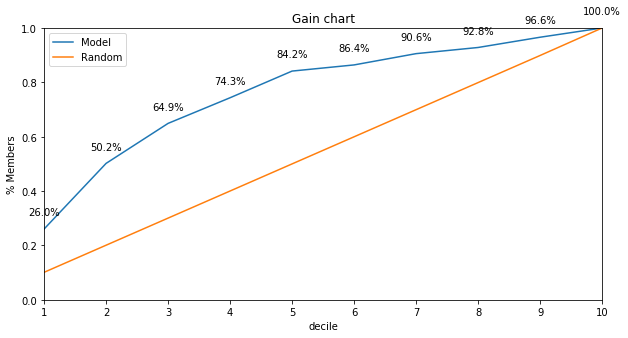


Event Rate by Deciles :


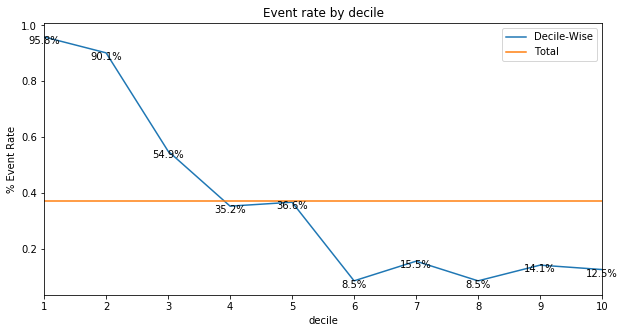


Histogram of Predicted probability:


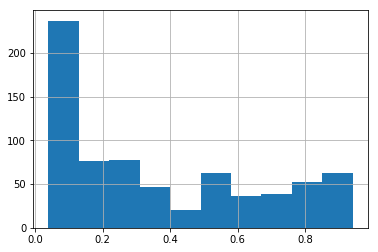


Summary of Predicted probability:
count    712.000000
mean       0.370533
std        0.288084
min        0.039914
25%        0.100988
50%        0.252793
75%        0.634395
max        0.940258
Name: Log_y_prob, dtype: float64


In [20]:
decile_gain(id_train,X_train_scaled,logistic_model_scaled,'Log')

### Regularization

Overfitted models tend to have good performance with the data used to fit them (the training data), but they behave poorly with unseen data (or test data, which is data not used to fit the model).

Overfitting usually occurs with complex models. Regularization normally tries to reduce or penalize the complexity of the model. Regularization techniques applied with logistic regression mostly tend to penalize large coefficients 𝑏₀, 𝑏₁, …, 𝑏ᵣ:

* L1 regularization penalizes the LLF with the scaled sum of the absolute values of the weights: |𝑏₀|+|𝑏₁|+⋯+|𝑏ᵣ|.
* L2 regularization penalizes the LLF with the scaled sum of the squares of the weights: 𝑏₀²+𝑏₁²+⋯+𝑏ᵣ².
* Elastic-net regularization is a linear combination of L1 and L2 regularization.


Regularization can significantly improve model performance on unseen data.

In [21]:
model_l1=LogisticRegression(penalty='l1').fit(X_train,y_train)
coef_l1 = pd.DataFrame({'features':X_train.columns,'coef_l1':model_l1.coef_.reshape((X_train.shape[1],))})

model_l2=LogisticRegression(penalty='l2').fit(X_train,y_train)
coef_l2 = pd.DataFrame({'features':X_train.columns,'coef_l2':model_l2.coef_.reshape((X_train.shape[1],))})

coef_l1.set_index('features').join(coef_l2.set_index('features'))


C:\Users\pbhere\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pbhere\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,coef_l1,coef_l2
features,,
Age,-0.026201,-0.025554
Fare,-0.000741,-0.000440
TravelAlone,0.067321,0.089819
Pclass_1,1.926821,1.309855
Pclass_2,1.135261,0.585392
Pclass_3,0.000000,-0.574172
Embarked_C,0.638228,0.738398
Embarked_Q,0.354818,0.510625
Embarked_S,0.000000,0.072053


### Advantages
* One of the simplest machine learning algorithms yet provides great efficiency.
* It can also used for feature extraction
* Logistic models can be updated easily with new data using stochastic gradient descent.

### Disadvantages
* Doesn’t handle large number of categorical variables well.
* It requires transformation of non-linear features.
* They are not flexible enough to naturally capture more complex relationships.

In [19]:
#Important Functions

def event_func(df,output,col):
    member_cnt=len(df)
    event_cnt=sum(output)
    
    print("\n \t\t\tEvent Rate by ",col)
    df1=pd.crosstab(df[col],output).reset_index()
    df1.columns=[col,'Non_Event','Event']
    df1['Total']=df1['Non_Event']+df1['Event']
    df1['Perc_Members']=df1['Total']/member_cnt
    df1['Perc_Event']=df1['Event']/event_cnt
    df1['Event_Rate']=df1['Event']/df1['Total']
    df1.drop(['Non_Event'],axis=1,inplace=True)
    
    return df1

def event_chart(data,col): 
    Event_plt=plt.bar(data[col],data['Event'],bottom=(data['Total']-data['Event']))
    Non_Event_plt=plt.bar(data[col],(data['Total']-data['Event']))
    plt.legend(['Event','Non_Event'])
    plt.xticks(rotation=45)
    for x,y,l in zip(data[col],data.Total,data.Event_Rate):
        label = "{:.1f}%".format(l*100)
        plt.text(x,y,label, ha='center')
    plt.show()
    
#Missing Value Imputation
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    

def create_dummies(df,cat_vars):
    #print("Variable list before :",df.columns)
    for var in cat_vars:
        cat_list='var'+'_'+var
        #cat_list = pd.get_dummies(df[var], prefix=var,drop_first=True)
        cat_list = pd.get_dummies(df[var], prefix=var)
        df1=df.join(cat_list)
        df=df1
        
        df_vars=df.columns.values.tolist()
        to_keep=[i for i in df_vars if i not in cat_vars]
        
        df_final=df[to_keep]
    #print("Variable list After :",df_final.columns)
    return df_final

def Performance_measure(model,df,actual):
    y_pred=model.predict(df)
    y_lapse_prob=model.predict_proba(df)[:,1]
    
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import auc
    
    print("\nProportion of Positive class predicted :", sum(y_pred)/len(y_pred))
    
    print("\nConfusion Matrix : \n", confusion_matrix(actual,y_pred))
    
    print("\n% Confusion Matrix : \n", confusion_matrix(actual,y_pred)/len(actual))
    
    print("\nClassification Report : \n", classification_report(actual,y_pred))
    
    print("\nPrecision Score : ", precision_score(actual, y_pred))
    print("\nRecall Score : ", recall_score(actual, y_pred))
    print("\nF1 Score : ", f1_score(actual, y_pred))
    
    print("ROC Curve")
    roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, y_lapse_prob)
    print("AUC Value is : ",auc(fpr, tpr))
    auc1=auc(fpr,tpr)
    plt.figure()
    #plt.plot(fpr, tpr, label='Area Under the curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr, tpr, label='Area Under the curve (area = %0.2f)' % auc1)
    
    
    
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()

def prob_pred(df,X_train,model,model_name):
    df[model_name+'_y_pred']=model.predict(X_train)
    df[model_name+'_y_prob']=model.predict_proba(X_train)[:,1]
    df[model_name+'_y_prob_decile']=pd.qcut(df[model_name+'_y_prob'],10,duplicates='drop')
    
    tmp=pd.DataFrame(df[model_name+'_y_prob_decile'].value_counts())
    tmp.sort_index(ascending=False,inplace=True)
    tmp.reset_index(inplace=True)
    tmp['decile']=tmp.index+1
    tmp.columns=[model_name+'_y_prob_decile',model_name+'_decile_members',model_name+'_y_decile']
    
    df1=pd.merge(df,tmp,how='left',on=[model_name+'_y_prob_decile'])
    df1.index=X_train.index
    
    return df1

def decile_summary(data,decile,prob):
    summary=pd.pivot_table(data, 
                index=decile, 
               values =['indvdl_id', 'Y',prob],  
                aggfunc={decile:len,'Y':[np.sum],prob:[min,max]})

    summary=pd.DataFrame({'Members':summary[decile]['len'],
                       'Event':summary['Y']['sum'],
                       'Min_Prob':summary[prob]['min'],
                       'Max_Prob':summary[prob]['max'],
                      })

    summary['Perc_Members']=summary['Members']/summary['Members'].sum()
    summary['Perc_Event']=summary['Event']/summary['Event'].sum()
    summary.reset_index(inplace=True)
    summary.sort_values(decile,ascending=True,inplace=True)
    summary['Cum_Perc_Members']=summary['Perc_Members'].cumsum()
    summary['Cum_Perc_Event']=summary['Perc_Event'].cumsum()
    summary['Event_Rate']=summary['Event']/summary['Members']

    return summary

def decile_summary_OEP(data,decile,prob):
    summary=pd.pivot_table(data, 
                index=decile, 
               values =['FINAL_MBI', 'OEP_VLAPSE_FLAG',prob], 
                aggfunc={decile:len,'OEP_VLAPSE_FLAG':[np.sum],prob:[min,max]})

    summary=pd.DataFrame({'Members':summary[decile]['len'],
                       'Lapsers':summary['OEP_VLAPSE_FLAG']['sum'],
                       'Min_Prob':summary[prob]['min'],
                       'Max_Prob':summary[prob]['max'],
                      })

    summary['Perc_Members']=summary['Members']/summary['Members'].sum()
    summary['Perc_Lapsers']=summary['Lapsers']/summary['Lapsers'].sum()
    summary.reset_index(inplace=True)
    summary.sort_values(decile,ascending=True,inplace=True)
    summary['Cum_Perc_Members']=summary['Perc_Members'].cumsum()
    summary['Cum_Perc_Lapsers']=summary['Perc_Lapsers'].cumsum()

    return summary

def gain_chart(data,decile):
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.figure(figsize=(10,5))
    plt.plot(data['Cum_Perc_Event'],label='Model')
    plt.plot(data['Cum_Perc_Members'],label='Random')
    plt.title("Gain chart")
    plt.xlabel("decile")
    plt.ylabel("% Members")
    plt.legend(loc='best')
    plt.xlim(0,9,1)
    plt.ylim(0,1,0.1)
    plt.xticks(range(10), decile)
    for x,y,l in zip(range(10),data['Cum_Perc_Event'],data['Cum_Perc_Event']):
        label = "{:.1f}%".format(l*100)
        plt.text(x,y+0.05,label, ha='center')
    plt.show()
    
def event_decile_chart(data,decile):
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    data['Model_Rate']=data['Event'].sum()/data['Members'].sum()

    plt.figure(figsize=(10,5))
    plt.plot(data['Event_Rate'],label='Decile-Wise')
    plt.plot(data['Model_Rate'],label='Total')
    plt.title("Event rate by decile")
    plt.xlabel("decile")
    plt.ylabel("% Event Rate")
    plt.legend(loc='best')
    plt.xlim(0,9,1)
    plt.ylim(data['Event_Rate'].min()-0.05,data['Event_Rate'].max()+0.05,(data['Event_Rate'].max()-data['Event_Rate'].min())/10)
    plt.xticks(range(10), decile)
    for x,y,l in zip(range(10),data['Event_Rate'],data['Event_Rate']):
        label = "{:.1f}%".format(l*100)
        plt.text(x,y-0.025,label, ha='center')
    plt.show()
    
def prob_dist(data,prob):    
    NL=pd.DataFrame(data[data['VLAPSE_FG']==0][prob].describe())
    NL.columns=['Non_Lapsers']

    L=pd.DataFrame(data[data['VLAPSE_FG']==1][prob].describe())
    L.columns=['Lapsers']

    NL=NL.join(L)
    
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    
    return NL


def numeric_chart(data,col,event_flag):
    print("Bi-Variate summary of : ",col)
    sns.kdeplot(data[event_flag==1][col], shade=True, shade_lowest=False)
    sns.kdeplot(data[event_flag==0][col], shade=True, shade_lowest=False)
    plt.show()
    sns.boxplot(x=event_flag,y=data[col],data=data,palette='coolwarm')
    plt.show()
    
def numeric_summary(data):
    
    numeric_var=list(data[0:1].select_dtypes(include=['int64','float64']).columns.values)
    cat_var=list(data[0:1].select_dtypes(include=['object']).columns.values)
    
    temp=data[numeric_var]
    
    #5 point summary
    temp_summary=pd.DataFrame(temp.describe().T)
    
    #mode
    from scipy.stats import mode
    mod=mode(temp,axis=0)[0].flatten()
    temp_summary['mode']=mod.tolist()

    #shape
    temp_summary['skewness']=temp.skew() #Skewness
    temp_summary['kurtosis']=temp.kurtosis() #kurtosis
    
    #Missing values
    temp_summary['missing']=temp.isnull().sum() #Number of missing values
    temp_summary['perc_missing']=temp.isnull().sum()/len(temp) #Percentage of missing values

    return temp_summary

def cat_summary(data):
    cat_var=list(data[0:1].select_dtypes(include=['object']).columns.values)
    
    temp=data[cat_var]
    
    temp1=create_dummies(temp,cat_var)

    #5 point summary
    temp_summary=pd.DataFrame(temp1.describe().T)
    temp_summary

    #counts
    temp_summary['value_count']=temp1.sum() #counts
    temp_summary['perc_count']=temp1.sum()/len(temp1) #percent count
    temp_summary
    
    return temp_summary    

#Bi-variate Analysis

def cat_bivariate(data,Y):
    cat_var=list(data[0:1].select_dtypes(include=['object']).columns.values)
    
    temp=data[cat_var]
    
    temp1=create_dummies(temp,cat_var)

    #5 point summary
    temp_summary=pd.DataFrame(temp1.describe().T)
    temp_summary

    #counts
    temp_summary['value_count']=temp1.sum() #counts
    temp_summary['perc_count']=temp1.sum()/len(temp1) #percent count
    
    temp_summary['event_count']=temp1.loc[Y==1].sum() #counts
    temp_summary['perc_event_count']=temp1.loc[Y==1].sum()/temp1.loc[Y==1].sum().sum()
    temp_summary['event_Rate']=temp_summary['event_count']/temp_summary['value_count']
    
    return temp_summary


            
def attribution_member(data,ind):
    attr=data.describe()
    attr.drop(['count','std'],axis=0,inplace=True)
    
    zero=np.zeros((1,len(data.columns)))
    zero=pd.DataFrame(zero,columns=data.columns,index=['all_zero'])


    X_sample=pd.DataFrame(data.iloc[ind:ind+1,:])
    #X_sample=X_sample.append(X_sample,ignore_index=True)
    X_sample.index=['sample_member']

    sample=np.identity((len(data.columns)))
    sample_zeros=np.zeros((len(data.columns),len(data.columns)))

    sample_identity=pd.DataFrame(sample,columns=data.columns,index=data.columns+'_identity')
    print(sample_identity.shape)

    sample_mean=sample_identity.copy()
    sample_mean.index=data.columns+'_mean'
    print(sample_mean.shape)

    for col in data.columns:
        sample_mean.loc[col+'_mean',col]=data.mean()[col]

    print(sample_mean.shape)


    sample_value=pd.DataFrame(sample_zeros,columns=data.columns,index=data.columns+'_value')
    print(sample_value.shape)

    for col in data.columns:
        sample_value.loc[col+'_value',col]=X_sample.loc['sample_member',col]

    print(sample_value.shape)

    sample1=pd.concat([zero,attr,X_sample,sample_identity,sample_mean,sample_value],axis=0)
    print(sample1.shape)
    sample1
    
    return sample1

def decile_gain(data_id,data_train,model,model_prefix):
    temp_out=prob_pred(data_id,data_train,model,model_prefix)
    
    print("\nDecile Summary :")
    temp_decile=decile_summary(temp_out,model_prefix+'_y_decile',model_prefix+'_y_prob')
    print(temp_decile)
    
    print("\nGain Rate by Deciles :")
    gain_chart(temp_decile,temp_decile[model_prefix+'_y_decile'])
    
    print("\nEvent Rate by Deciles :")
    event_decile_chart(temp_decile,temp_decile[model_prefix+'_y_decile'])
    
    print("\nHistogram of Predicted probability:")
    plt.figure()
    temp_out[model_prefix+'_y_prob'].hist()
    plt.show()
    
    print("\nSummary of Predicted probability:")
    print(temp_out[model_prefix+'_y_prob'].describe())
    
    
    
def RF_imp(RFmodel,data,Imp_var):
    VarImp=pd.DataFrame({'columns':data.columns, 'RF_Imp':RFmodel.feature_importances_})
    VarImp.sort_values('RF_Imp',ascending=False)
    
    VarImp1=VarImp[VarImp['columns'].isin(Imp_var)].reset_index()
    VarImp1.drop('index',axis=1,inplace=True)
    
    print("Random Forest Important Features")
    print("% Importance captured : ",np.round(VarImp1.RF_Imp.sum()*100,2))

    features=VarImp1['columns']
    importances=VarImp1['RF_Imp']
    indices=np.argsort(VarImp1['RF_Imp'])
    plt.figure(figsize=[10,10])
    plt.title('Random Forest - Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    for x,y,l in zip(importances[indices]+0.003,range(len(indices)),importances[indices]):
            label = "{:.1f}%".format(l*100)
            plt.text(x,y+0.05,label, ha='center')
    plt.show()
    
def XGB_imp(XGBmodel,data,threshold,labels_data):
    VarImp=pd.DataFrame({'columns':data.columns, 'XGB_Imp':XGBmodel.feature_importances_})
    VarImp.sort_values('XGB_Imp',ascending=False)
    
    VarImp1=VarImp[VarImp['XGB_Imp']>=threshold].reset_index()
    VarImp1.drop('index',axis=1,inplace=True)
    
    VarImp1=pd.merge(VarImp1,labels_data,how='left',on='columns')
    
    
    #VarImp1=VarImp[VarImp['columns'].isin(Imp_var)].reset_index()
    #VarImp1.drop('index',axis=1,inplace=True)
    
    print("XGBoost Important Features")
    print("% Importance captured : ",np.round(VarImp1.XGB_Imp.sum()*100,2))

    features=VarImp1['labels']
    importances=VarImp1['XGB_Imp']
    indices=np.argsort(VarImp1['XGB_Imp'])
    plt.figure(figsize=[10,10])
    plt.title('XGBoost - Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    for x,y,l in zip(importances[indices]+0.005,range(len(indices)),importances[indices]):
            label = "{:.1f}%".format(l*100)
            plt.text(x,y+0.05,label, ha='center')
    plt.show()
    
def numeric_chart(data,col,event_flag):
    print("Bi-Variate summary of : ",col)
    sns.kdeplot(data[event_flag==1][col], shade=True, shade_lowest=False)
    sns.kdeplot(data[event_flag==0][col], shade=True, shade_lowest=False)
    plt.show()
    sns.boxplot(x=event_flag,y=data[col],data=data,palette='coolwarm')
    plt.show()
    print(data[event_flag==0][col].mean())
    print(data[event_flag==1][col].mean())
    
   
def EDA_Imp(data,y,Imp_var):
    
    data_cpy=data.copy()
    
    print("EDA on Important Variables")
    for i in range(len(Imp_var)): 
        print("Event Rate by :", Imp_var[i])
        
        if len(data_cpy[Imp_var[i]].value_counts())<=10:
            temp=event_func(data_cpy,y,Imp_var[i])
            print(temp)
            event_chart(temp,Imp_var[i])

        else :
            data_cpy[Imp_var[i]+'_bin']=pd.qcut(data_cpy[Imp_var[i]], q=10,duplicates='drop').astype(str)
            #data['var']=data.astype({'var': str})
            data_cpy.sort_values(by=Imp_var[i]+'_bin',ascending=True)
            temp=event_func(data_cpy,y,Imp_var[i]+'_bin')
            print(temp)
            event_chart(temp,Imp_var[i]+'_bin')